In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import time
import math
import seaborn as sns
import pandas as pd
import scipy

In [2]:
data = np.genfromtxt('arisi_cufino_5_4/Attenuation_h=0deg_v=0deg_x=0mm.txt', delimiter = '\t', names=True)
print(type(data['C1'][0]))
file='Attenuation_h=45deg_v=0deg_x=0mm.txt'
k = float(file.split('Attenuation_h=')[1].split('deg_v=0deg_x=0mm.txt')[0])
print(type(k))


<class 'numpy.float64'>
<class 'float'>


In [3]:
def get_data(file_name):
    data = np.genfromtxt(file_name, delimiter = '\t', names=True)
    return data

# 5_5

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45.] [1518.2 1529.  1524.6 1489.8 1545.8 1524.4 1508.4 1549.6 1564.  1520.4
 1530.6 1524.8 1500.8 1515.2 1567.  1550.  1515.4 1453.  1460.  1429.6
 1431.8 1487.  1464.6 1473.  1445.  1441.6 1440.8 1415.4 1414.6 1404.8
 1399.4 1389.  1377.4 1359.8 1338.2 1319.4 1328.  1301.8 1287.2 1300.4
 1291.2 1293.8 1282.6 1265.  1263.2 1263.8] [1356631.6 1356715.4 1357562.4 1352199.6 1361705.  1357766.6 1356738.4
 1362176.6 1365280.4 1360360.2 1360727.2 1360485.2 1355470.4 1357922.6
 1368692.4 1362986.2 1356822.8 1344915.4 1344113.  1340063.4 1338211.2
 1347623.4 1344203.8 1344875.6 1343674.  1339757.4 1337735.8 1334933.6
 1336044.2 1334215.8 1328653.8 1324707.6 1324629.6 1322079.  1317841.6
 1317329.2 1317485.  1313642.2 1311779.6 1313563.4 1309641.8 1311608.6
 1307464.4 1305278.8 1306075.4 1304066. ]
Peak angle = 14


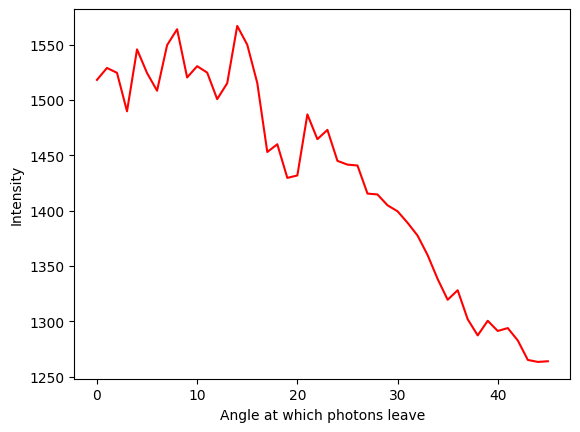

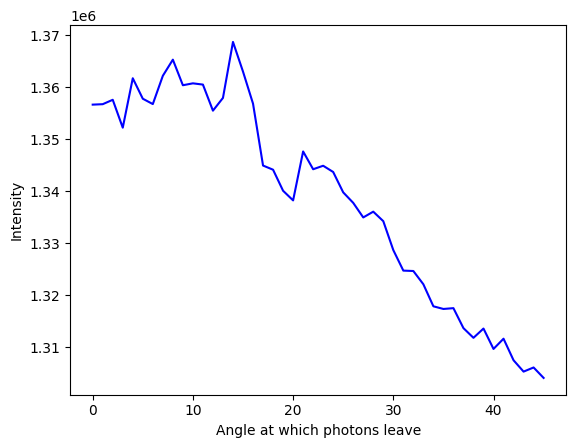

In [4]:
#easier to append arrays
tot_intensity = np.zeros(46)
max_intensity = np.zeros(46)
h = np.zeros(46)

for file in os.listdir('arisi_cufino_5_4'):
    if "Attenuation" in file:
        #print(file)
        angle = int(file.split('Attenuation_h=')[1].split('deg_v=0deg_x=0mm.txt')[0])
        h[angle]=angle
        data = get_data('arisi_cufino_5_4/'+file)
        max_intensity[angle]=np.max(data['C1'])
        tot_intensity[angle]=np.sum(data['C1'])

            
print(h, max_intensity, tot_intensity)

plt.figure()
plt.plot(h, max_intensity, color='red', label='Peak Intensity for a certain lamba')
plt.xlabel('Angle at which photons leave')
plt.ylabel('Intensity')

peak_angle=np.where(max_intensity == np.max(max_intensity))[0][0]
print('Peak angle = {}'.format(peak_angle))



plt.figure()
plt.plot(h, tot_intensity, color='blue', label='Total Intensity for the whole spectrum')
plt.xlabel('Angle at which photons leave')
plt.ylabel('Intensity')

peak_angle2=np.where(tot_intensity == np.max(tot_intensity))[0][0]
print('Peak angle2 = {}'.format(peak_angle2))

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45.] [855.  858.6 849.8 858.2 861.2 861.8 865.2 895.8 852.4 847.2 849.  932.4
 878.4 917.  794.8 788.6 802.  862.8 876.  785.  795.8 786.4 794.  793.6
 882.6 880.8 883.4 921.4 973.6 980.6 980.6 850.8 990.4 916.4 892.4 897.2
 901.  987.8 974.6 925.6 977.8 976.6 973.  966.6 981.2 977. ] [1184286.4 1184266.8 1184991.2 1183378.  1183053.8 1183224.8 1182618.8
 1183077.4 1183111.6 1185747.4 1185352.8 1184296.  1184134.6 1184429.
 1184040.6 1184227.6 1183971.  1183614.  1183252.6 1183395.8 1182785.2
 1182798.2 1182447.6 1182465.8 1182656.6 1182991.2 1182612.4 1182634.6
 1182831.2 1182950.6 1182793.2 1182550.  1183129.6 1182179.8 1182039.4
 1182165.  1182227.4 1182241.  1182209.2 1182064.4 1182196.8 1181907.
 1181828.2 1181775.4 1181978.6 1181473.2]
Peak angle = 32
Peak angle2 = 9


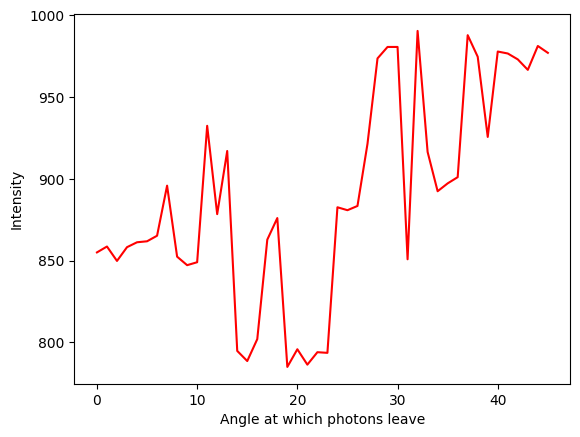

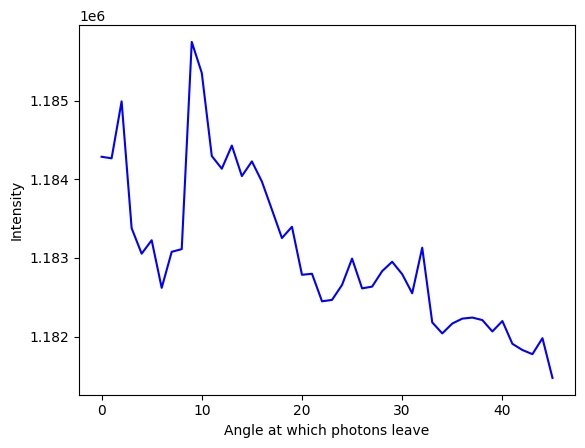

In [5]:
#easier to append arrays
d_tot_intensity = np.zeros(46)
d_max_intensity = np.zeros(46)
d_h = np.zeros(46)

for file in os.listdir('arisi_cufino_5_4'):
    if "DarkCounts" in file:
        #print(file)
        angle = int(file.split('DarkCounts_h=')[1].split('deg_v=0deg.txt')[0])
        d_h[angle]=angle
        data = get_data('arisi_cufino_5_4/'+file)
        d_max_intensity[angle]=np.max(data['C1'])
        d_tot_intensity[angle]=np.sum(data['C1'])

            


print(d_h, d_max_intensity, d_tot_intensity)

plt.figure()
plt.plot(d_h, d_max_intensity, color='red', label='Peak Intensity for a certain lamba')
plt.xlabel('Angle at which photons leave')
plt.ylabel('Intensity')

d_peak_angle=np.where(d_max_intensity == np.max(d_max_intensity))[0][0]
print('Peak angle = {}'.format(d_peak_angle))



plt.figure()
plt.plot(d_h, d_tot_intensity, color='blue', label='Total Intensity for the whole spectrum')
plt.xlabel('Angle at which photons leave')
plt.ylabel('Intensity')

d_peak_angle2=np.where(d_tot_intensity == np.max(d_tot_intensity))[0][0]
print('Peak angle2 = {}'.format(d_peak_angle2))

Peak angle = 14


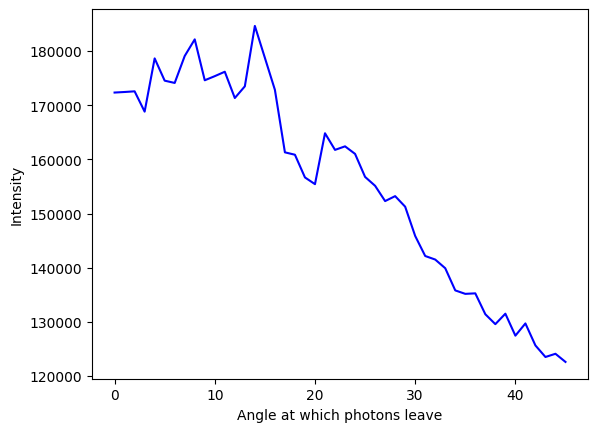

In [6]:
real_int=tot_intensity-d_tot_intensity
plt.figure()
plt.plot(h, real_int, color='blue', label='Total Intensity for the whole spectrum')
plt.xlabel('Angle at which photons leave')
plt.ylabel('Intensity')

peak_angle3=np.where(real_int == np.max(real_int))[0][0]
print('Peak angle = {}'.format(peak_angle3))

# 5_4

In [7]:

dep = []
dark=[]

for file in os.listdir('arisi_cufino_5_3'):
    if "DarkCounts" in file:
        d_meas=[]
        #print(file)
        angle = float(file.split('DarkCounts_h=0deg_v=')[1].split('deg.txt')[0])
        data = get_data('arisi_cufino_5_3/'+file)
        d_intensity=np.sum(data['C1'])
        d_meas.append(angle)
        d_meas.append(d_intensity)
        dark.append(d_meas)
  

dark=np.array(dark)
print(dark)


for file in os.listdir('arisi_cufino_5_3'):
    if "Attenuation" in file:
        data = get_data('arisi_cufino_5_3/'+file)
        intensity=np.sum(data['C1'])
        meas=[]
        
        inf = file.split('Attenuation_h=0deg_')[1].split('.txt')[0]
        angle=float(inf.split('v=')[1].split('deg_x')[0])
        x=float(inf.split('deg_x=')[1].split('mm')[0])
        
        meas.append(angle)
        meas.append(x)
        meas.append(intensity)
        dep.append(meas)

dep=np.array(dep)
print(dep)
dep_map=dep


[[1.6000000e+01 1.2031848e+06]
 [2.0000000e+01 1.2256626e+06]
 [3.2000000e+01 1.1996454e+06]
 [8.0000000e+00 1.2065056e+06]
 [4.0000000e+00 1.2075494e+06]
 [0.0000000e+00 1.2066586e+06]
 [3.6000000e+01 1.1996232e+06]
 [2.8000000e+01 1.2008826e+06]
 [2.4000000e+01 1.2054110e+06]
 [1.2000000e+01 1.2052984e+06]
 [4.0000000e+01 1.1996538e+06]]


In [ ]:
def order_angles(dep):
    ang=dep[:, 0]
    xs=dep[:, 1]
    values=dep[:, 2]
    xs_new=np.zeros(len(xs))
    ang_new=np.zeros(len(ang))
    values_new=np.zeros(len(values))
    index=np.argsort(ang)
    for i in range(len(index)): 
        xs_new[i]= xs[index[i]]
        ang_new[i]= ang[index[i]]
        values_new[i]= values[index[i]]

    dep[:, 0]=ang_new
    dep[:, 1]=xs_new
    dep[:, 2]=values_new
    #dep=np.concatenate((ang_new, xs_new, values_new), axis=1)
    return dep

dep = order_angles(dep)

In [ ]:
def exp(x, I0, a):
    return I0*np.exp(-a*x)
    #return I0 + a*x

(220, 3)
[[0.0000000e+00 1.9000000e+03 1.2617836e+06]
 [0.0000000e+00 1.2000000e+03 1.2660812e+06]
 [0.0000000e+00 3.0000000e+02 1.3842726e+06]
 [0.0000000e+00 5.0000000e+02 1.3712248e+06]
 [0.0000000e+00 1.0000000e+02 1.3850506e+06]
 [0.0000000e+00 1.8000000e+03 1.2630058e+06]
 [0.0000000e+00 6.0000000e+02 1.2747292e+06]
 [0.0000000e+00 8.0000000e+02 1.2738480e+06]
 [0.0000000e+00 1.4000000e+03 1.2667464e+06]
 [0.0000000e+00 1.7000000e+03 1.2652522e+06]
 [0.0000000e+00 1.1000000e+03 1.2704984e+06]
 [0.0000000e+00 1.6000000e+03 1.2650870e+06]
 [0.0000000e+00 4.0000000e+02 1.3757382e+06]
 [0.0000000e+00 2.0000000e+02 1.3823532e+06]
 [0.0000000e+00 1.0000000e+03 1.2723582e+06]
 [0.0000000e+00 0.0000000e+00 1.3820130e+06]
 [0.0000000e+00 7.0000000e+02 1.2749434e+06]
 [0.0000000e+00 1.5000000e+03 1.2661016e+06]
 [0.0000000e+00 1.3000000e+03 1.2672164e+06]
 [0.0000000e+00 9.0000000e+02 1.2739898e+06]] (11, 20, 3) 11
[0.0, 4.0, 8.0, 12.0, 16.0, 20.0, 24.0, 28.0, 32.0, 36.0, 40.0] [0.00012743

'\nvert = dep[:, 0]\nx = dep[:, 1]\nval = dep[:, 2]\nindex1 = np.argsort(vert)\n#print(vert, index1)\nfor i in range(0, len(index1)): \n    x[i]= x[index1[i]]\n    val[i]= val[index1[i]]\n'

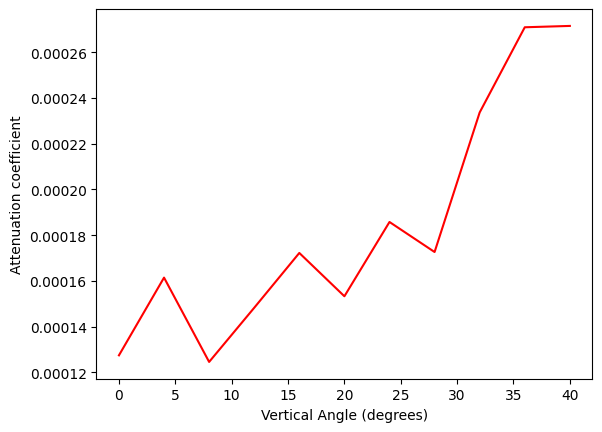

In [ ]:
#print(dep)
#dividing in blocks by angle
print(dep.shape)
dep=dep.reshape(11, 20, 3)
print(dep[0], dep.shape, len(dep))

# keep a vector with the real intensity substracting the dark counts. Don't need it for the fit but later for the heatmap.
real_intensity=[]

angles=[]
attenuation=[]
for i in range(len(dep)):
    
    #for each angle an array of x's and intensity values
    ang = dep[i][0][0]
    angles.append(ang)
    xs = dep[i][:, 1]
    intensity= dep[i][:, 2]
    #for the real count i subtract the dark counts. The index is i cause dark has the same order of angles as dep (0, 12, ecc.)
    real_int=intensity-dark[i, 1]
    real_intensity.append(real_int)
    
    #sorting the x for the fit and the plot
    xs_new=np.zeros(len(xs))
    real_int_new=np.zeros(len(real_int))
    index=np.argsort(xs)
    for i in range(0, len(index)): 
        xs_new[i]= xs[index[i]]
        real_int_new[i]= real_int[index[i]]
    
    #fit with exponential function
    par, cov=scipy.optimize.curve_fit(exp, xs_new[0:6], real_int_new[0:6], p0=(1, 0))
    a=par[1]
    attenuation.append(a)

print(angles, attenuation)
angles_new=np.zeros(len(angles))
attenuation_new=np.zeros(len(attenuation))
index=np.argsort(angles)
for i in range(0, len(index)): 
    angles_new[i]= angles[index[i]]
    attenuation_new[i]= attenuation[index[i]]
    
plt.figure()
plt.plot(angles_new, attenuation_new, color='red')
plt.xlabel('Vertical Angle (degrees)')
plt.ylabel('Attenuation coefficient')
    
'''
vert = dep[:, 0]
x = dep[:, 1]
val = dep[:, 2]
index1 = np.argsort(vert)
#print(vert, index1)
for i in range(0, len(index1)): 
    x[i]= x[index1[i]]
    val[i]= val[index1[i]]
''' 


[   0.  100.  200.  300.  400.  500.  600.  700.  800.  900. 1000. 1100.
 1200. 1300. 1400. 1500. 1600. 1700. 1800. 1900.] [178828.2 181865.8 179168.4 181087.8 172553.4 168040.   71544.4  71758.6
  70663.2  70805.   69173.4  67313.6  62896.4  64031.6  63561.6  62916.8
  61902.2  62067.4  59821.   58598.8]
[1.82608738e+05 1.27438433e-04]


Text(0, 0.5, 'Intensity')

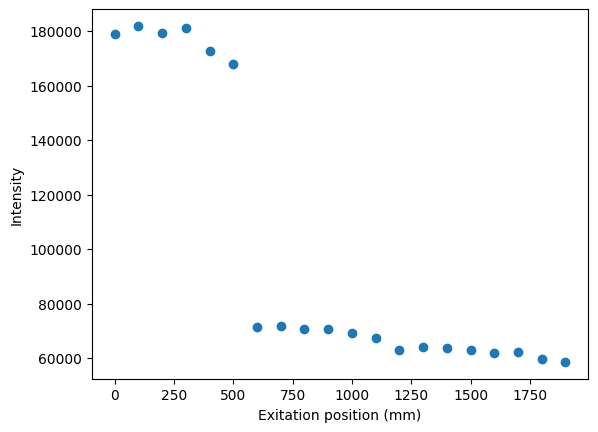

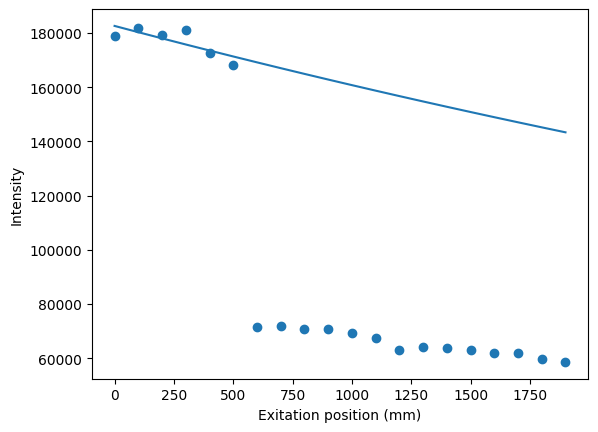

In [ ]:
# Example of the fit with vertical angle 0

y = dep[0][:, 1]
z = dep[0][:, 2]-dark[0, 1]
y_new=np.zeros(len(y))
z_new=np.zeros(len(z))
index=np.argsort(y)
for i in range(0, len(index)): 
    y_new[i]= y[index[i]]
    z_new[i]= z[index[i]]


print(y_new, z_new)

par, cov=scipy.optimize.curve_fit(exp, y_new[0:6], z_new[0:6], p0=(1, 0))
print(par)
plt.figure()
plt.scatter(y_new, z_new)
plt.xlabel('Exitation position (mm)')
plt.ylabel('Intensity')
plt.figure()
plt.scatter(y_new, z_new, label='Measured Intensity')
plt.plot(y_new, exp(y_new, par[0], par[1]), label='Exponential fit')
plt.xlabel('Exitation position (mm)')
plt.ylabel('Intensity')


(220,)


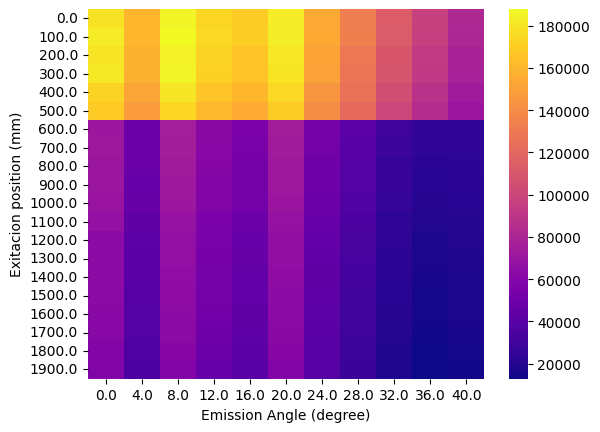

In [ ]:
'''
plt.figure() 
plt.scatter(dep[:, 0], dep[:, 1], c=dep[:, 2])
plt.xlabel('Emission Angle (degree)')
plt.ylabel('Exitacion position (mm)')
plt.show()
'''
real_intensity=np.array(real_intensity)
#print(real_intensity)
real_intensity=real_intensity.reshape(220)
print(real_intensity.shape)


real_intensity=np.array(real_intensity)
mapp=pd.DataFrame({'Emission Angle (degree)': dep_map[:, 0], 'Exitacion position (mm)': dep_map[:, 1], 'Intensity': real_intensity})
mapp = mapp.pivot(index='Exitacion position (mm)', columns='Emission Angle (degree)', values='Intensity')
#print(dep_map)
sns.heatmap(mapp, cmap='plasma')
plt.show()